In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import text
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import re
import dataframe_image as dfi
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df1 = pd.read_csv('../data/new_data_part1.csv')
df2 = pd.read_csv('../data/new_data_part2.csv')
df = pd.concat([df1, df2], ignore_index=True)

In [3]:
X = df.drop(columns = 'subreddit')
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    random_state=42)

In [4]:
my_words_list= (['ufc', 'dana', 'white', 'ultimate', 'u.f.c.', 'islam', 'makhachev', 'moreno', 'edwards', 'usman', 'ngannou', 'adesanya',
                  'pantoja', 'kara', 'kai', 'oliveira', 'pereira', 'sterling', 'royval', 'nicolau', 'perez', 'albazi', 'schnell', 'omalley', 'yan',
                  'dvalishvili', 'vera', 'sandhagen', 'font', 'cruz', 'holloway', 'volkanovski', 'figueiredo', 'deiveson', 'aljamain', 'rodriguez',
                  'ortega', 'allen', 'emmett', 'chan', 'sung', 'jung', 'kattar', 'giga', 'chikadze', 'poirier', 'jones', 'elliott', 'dvorak', 'molina', 'mokaev',
                  'ulanbekov', 'yanez', 'gutierrez', 'nurmagomedov', 'simon', 'munhoz', 'shore', 'topuria', 'evloev', 'mitchell', 'yusuff', 'iga', 'barboza',
                  'caceres', 'burns', 'neal', 'luque', 'fiziev', 'gamrot', 'anjos', 'tsarukyan', 'turner', 'hooker', 'ismagulov', 'gaethje', 'magny', 'whittaker',
                  'vettori', 'strickland', 'costa', 'hermansson', 'covington', 'muniz', 'imavov', 'bachowicz', 'rakic', 'cannonier', 'dolidze', 'brunson', 'oezdemir',
                  'spann', 'walker', 'nunes', 'weili', 'shevchenko', 'pena', 'blaydes', 'tuivasa', 'aspinall', 'andrade', 'santos', 'daukaus', 'tybura', 'lewis', 'holm',
                  'vieira', 'jandiroba', 'maia', 'grasso', 'chookagian', 'murphy', 'fiorot', 'lemos', 'namajunas', 'esparza', 'jandiroba', 'blanchfield', 'barber',
                  'calvillo', 'ribas', 'viana', 'ducote', 'pinheiro', 'xiaonan', 'yan', 'abdurakhimov', 'spivac', 'shamil', 'ketlen', 'pennington', 'miesha', 'kunitskaya',
                  'rosa', 'avila', 'lansberg', 'paddy', 'silva', 'cormier', 'diaz', 'miocic', 'lesnar', 'penn', 'liddell', 'pierre', 'rousey', 'khabib', 'conor', 'mcgregor',
                  'frevola', 'dillashaw', 'pimblett', 'helwani', 'blachowicz','arlovski', 'donatello', 'dec', 'december', 'jan', 'feb', 'selftext', 'says', 'did', 'does',
                  'guy', 'guys', 'know', 'fc', 'vs', 'https', 'khamzat', '2022', '2023', '219', '281', '282', '283', '284', '285', 'going', 'man', 'got', 'anne', 'didnt', 
                  'ufc281', 'ankalaev', 'zhang', 'israel', 'johnson', 'dustin', 'krause', 'chandler', 'jiri', 'cejudo', 'march', 'february', 'gordon', 'ilia', 'florian',
                  'makachov', 'beneil', 'dariush', 'jared', 'bryce', 'shavkat', 'november', 'saturday', 'wa', 'ha'])
stop_words_list = text.ENGLISH_STOP_WORDS.union(my_words_list)

In [5]:
ct = ColumnTransformer([
    ('cvec', CountVectorizer(max_features=4000,
                             max_df = 0.1,
                             min_df = 2,
                             stop_words=stop_words_list,
                             ngram_range=(1,1)), 
     'title'),
])

In [7]:
#Best from previous investigation

lvl1_est_2 = [
    ('nb', MultinomialNB()),
    ('rf', RandomForestClassifier()),
    ('logr', LogisticRegression(max_iter=1000))
]

stacked_2 = StackingClassifier(estimators=lvl1_est_2, 
                               final_estimator=LogisticRegression(),
                               n_jobs = -1)
pipe02 = Pipeline([
    ('ct', ct),
    ('s1', stacked_2)
])

print(cross_val_score(pipe02, X_train, y_train).mean())
pipe02.fit(X_train, y_train)
print(f'Training Score: {pipe02.score(X_train, y_train)}')
print(f'Testing Score: {pipe02.score(X_test, y_test)}')

0.7199900904532165
Training Score: 0.911394084096034
Testing Score: 0.7319013524264121


---
#####
### Top Features Used By the Model

#####
---

In [7]:
X = df.drop(columns = 'subreddit')
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    random_state=42)

cvec = CountVectorizer(min_df = 2,
                       max_df = 0.1,
                       max_features=4000,
                       stop_words=stop_words_list,
                       ngram_range=(1,2))
X_train_cvec = cvec.fit_transform(X_train['title'])
X_test_cvec = cvec.transform(X_test['title'])
train_df = pd.DataFrame(X_train_cvec.todense(), columns = cvec.get_feature_names_out(), index = X_train.index)
test_df = pd.DataFrame(X_test_cvec.todense(), columns = cvec.get_feature_names_out(), index = X_test.index)
cvec_df = pd.concat([test_df, train_df], ignore_index=True)

In [8]:
nb= MultinomialNB()
nb.fit(X_train_cvec, y_train)
print(nb.score(X_test_cvec, y_test))
rf = RandomForestClassifier()
rf.fit(X_train_cvec, y_train)
print(rf.score(X_test_cvec, y_test))
log = LogisticRegression(max_iter = 1000)
log.fit(X_train_cvec, y_train)
print(log.score(X_test_cvec, y_test))

0.7096260938743039
0.7088305489260143
0.7211614956245028


In [9]:
nb_features = nb.coef_[0]
rf_features = rf.feature_importances_
log_features = log.coef_[0]

features = pd.DataFrame(index = cvec.get_feature_names_out(X_train))
features['nb_features'] = nb_features
features['rf_features'] = rf_features
features['log_features'] = log_features

In [10]:
nb_top_200 = features['nb_features'].sort_values(ascending=False).head(200)
rf_top_200 = features['rf_features'].sort_values(ascending=False).head(200)
log_top_200 = features['log_features'].sort_values(ascending=False).head(200)
log_bottom_200 = features['log_features'].sort_values().head(200)

In [11]:
#Looking for features in all three models
two = [i for i in nb_top_200.index if i in rf_top_200.index]
shared = [i for i in two if i in log_top_200]
shared

['anikflorianpod',
 'people',
 'won',
 'judge',
 'don',
 'till',
 'doe',
 'fan',
 'opinion',
 'decision',
 'lol',
 'robbery',
 'better',
 'jake',
 'draw',
 'worst',
 'week',
 'unpopular opinion',
 'judges',
 'thoughts',
 'ranked',
 'wins',
 'goat',
 'crazy',
 'sub',
 'rigged',
 'favorite',
 'true',
 'winner',
 'far']

In [13]:
# Finding Count for each of the shared top features
features = ['[Aa][Nn][Ii][Kk][Ff][Ll][Oo][Rr][Ii][Aa][Nn][Pp][Oo][Dd]', '[Pp]eople', '[Ww]on', '[Dd]on', '[Jj]udge', '[Tt]ill', '[Dd]oe', '[Ff]an', '[Oo]pinion', '[Dd]ecision', '[Ll][Oo][Ll]', '[Rr]obbery', '[Bb]etter', '[Jj]ake', '[Dd]raw', '[Ww]orst', '[Ww]eek', '[Uu]npopular [Oo]pinion', '[Jj]udges', '[Tt]houghts', '[Rr]anked', '[Ww]ins', '[Vv]olk', '[Gg][Oo][Aa][Tt]', '[Cc]razy', '[Ss]ub', '[Rr]igged', '[Ff]avorite', '[Tt]rue', '[Ff]ar']
ufc_counters = []
mma_counters = []

for word in features:
    ufc_counter = 0
    mma_counter = 0
    for i in range(0, len(df['title'])-1):
        if len(re.findall(word, df['title'][i])) != 0:
            if df['subreddit'][i] == 1:
                ufc_counter += 1
            else:
                mma_counter += 1
    ufc_counters.append(ufc_counter)
    mma_counters.append(mma_counter)

features_df = pd.DataFrame(index = features)
features_df['ufc'] = ufc_counters
features_df['mma'] = mma_counters
features_df.index = shared
features_table = features_df.head(15)
#dfi.export(features_table, "../images/features_table.png")
features_df

,ufc,mma
anikflorianpod,92,0
people,90,35
won,104,59
judge,211,122
don,119,34
till,132,58
doe,151,75
fan,96,56
opinion,75,18
decision,83,23


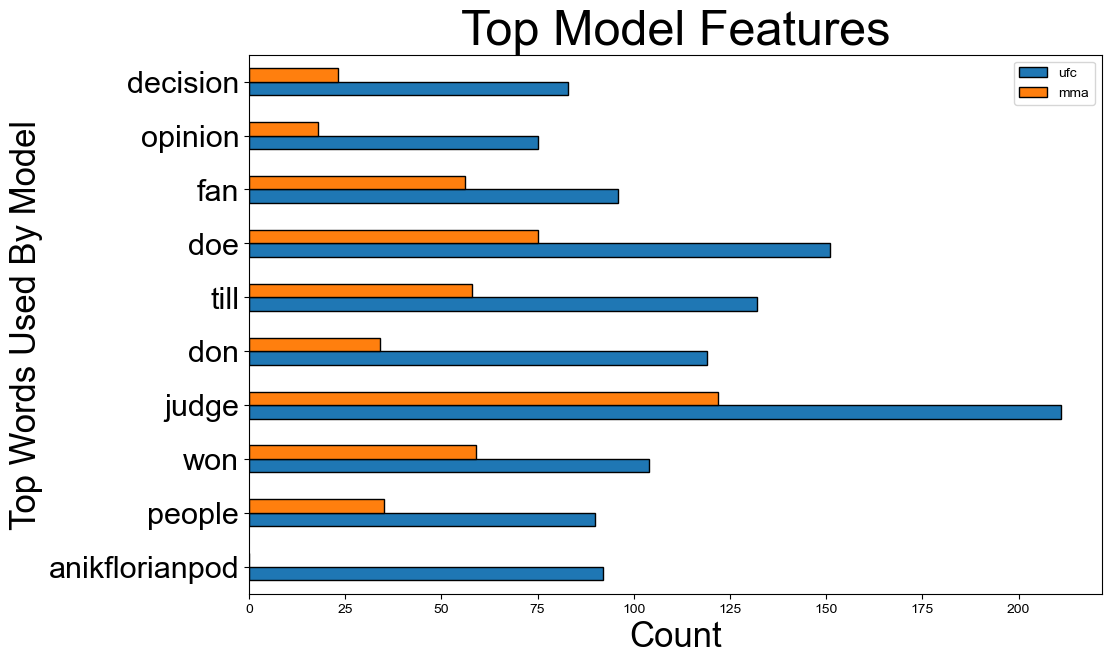

In [14]:
features_df.head(10).plot(kind = 'barh', figsize = (11, 7), edgecolor = 'black')
plt.rcParams['font.family'] = "Times New Roman";
sns.set_palette('Pastel1');
sns.set_style('dark');
plt.title('Top Model Features', fontsize = 35);
plt.ylabel('Top Words Used By Model', fontsize = 25);
plt.xlabel('Count', fontsize = 25);
plt.yticks(fontsize = 22)
plt.savefig('../images/top_features.png', bbox_inches='tight');

---
#####
### Top Words

#####
---

In [15]:
ufc_top = cvec_df[df['subreddit'] == 1].sum().sort_values(ascending=False)[:20]
ufc_top

mma         344
fighter     310
think       157
like        157
year        142
win         139
spoiler     120
just        117
amp         116
time        116
event       110
main        105
title       100
say         100
alex         93
card         93
best         91
official     90
new          87
make         81
dtype: int64

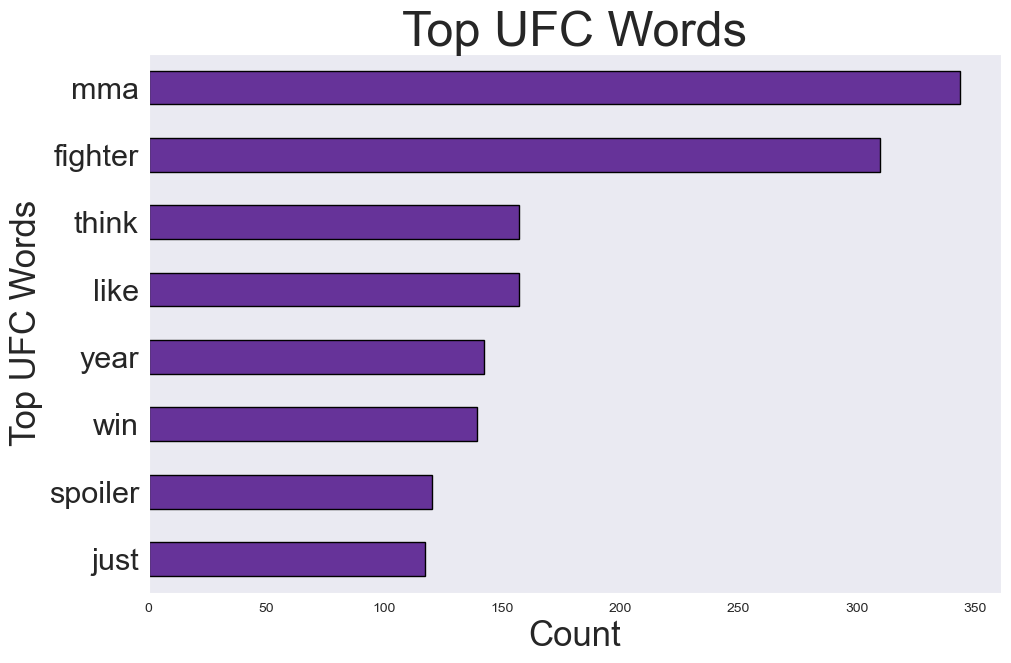

In [16]:
# Need this to help flip y axis: https://stackoverflow.com/questions/2051744/how-to-invert-the-x-or-y-axis
ufc_top[:8].plot(kind = 'barh', figsize = (11, 7), edgecolor = 'black', color = 'rebeccapurple')
plt.rcParams['font.family'] = "Times New Roman";
sns.set_style('dark');
plt.title('Top UFC Words', fontsize = 35);
plt.ylabel('Top UFC Words', fontsize = 25);
plt.xlabel('Count', fontsize = 25);
plt.yticks(fontsize = 22)
ax = plt.gca()
ax.invert_yaxis()
plt.savefig('../images/top_ufc.png', bbox_inches='tight');

In [17]:
mma_top = cvec_df[df['subreddit'] == 0].sum().sort_values(ascending=False)[:20]
mma_top

mma         360
fighter     280
think       156
year        150
like        149
spoiler     136
just        132
event       132
win         122
best        120
amp         119
title       117
time        112
main        108
alex         96
say          95
prime        93
card         92
new          86
bellator     82
dtype: int64

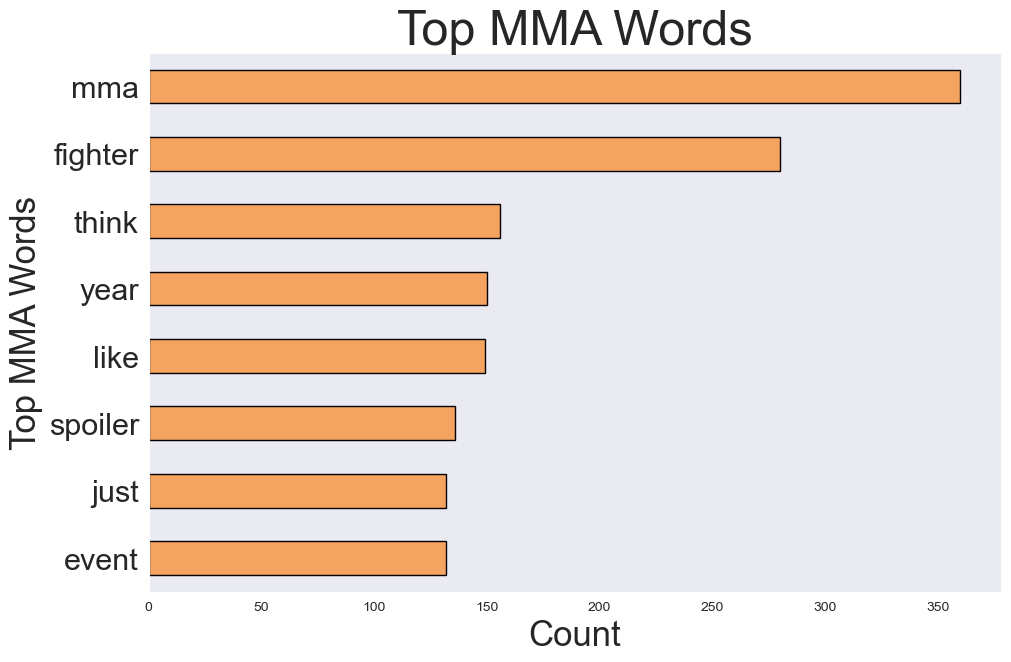

In [18]:
mma_top[:8].plot(kind = 'barh', figsize = (11, 7), edgecolor = 'black', color = 'sandybrown')
plt.rcParams['font.family'] = "Times New Roman";
sns.set_style('dark');
plt.title('Top MMA Words', fontsize = 35);
plt.ylabel('Top MMA Words', fontsize = 25);
plt.xlabel('Count', fontsize = 25);
ax = plt.gca()
ax.invert_yaxis()
plt.yticks(fontsize = 22)
plt.savefig('../images/top_mma.png', bbox_inches='tight');

In [19]:
top_words = pd.DataFrame(columns = ['mma', 'ufc'])
top_words['mma'] = mma_top.index
top_words['ufc'] = ufc_top.index

In [24]:
# Top 8 words from both subreddits
    # Note the amount of similarities
top8 = top_words[:8]
#dfi.export(top8, "../images/top8.png")
top8

,mma,ufc
0,mma,mma
1,fighter,fighter
2,think,think
3,year,like
4,like,year
5,spoiler,win
6,just,spoiler
7,event,just


In [ ]:
vect_df = pd.DataFrame(data = pd.concat([train_df, test_df]))
vect_df.sort_index(inplace = True)
vect_df['subreddit'] = df['subreddit']

In [13]:
top_100_mma = vect_df[vect_df['subreddit'] == 0].sum().sort_values(ascending = False)[:100]
top_100_ufc = vect_df[vect_df['subreddit'] == 1].sum().sort_values(ascending = False)[:100]

In [14]:
same = [i for i in top_100_mma.index if i in top_100_ufc.index]
same

['fight',
 'mma',
 'fighter',
 'ha',
 'event',
 'alex',
 'amp',
 'main',
 'year',
 'title',
 'wa',
 'time',
 'say',
 'new',
 'card',
 'main event',
 'win',
 'like',
 'best',
 'just',
 'champion',
 'night',
 'think',
 'make',
 'want',
 'weight',
 'prime',
 '10',
 'fighting',
 'belt',
 'post',
 'good',
 'champ',
 'round',
 'beat',
 'ariel',
 'talk',
 'shot',
 'need',
 'getting',
 'sean',
 'jon',
 'watch',
 'right',
 've',
 'day',
 'glover',
 'jake',
 'joe',
 'division']

In [15]:
different_mma = [i for i in top_100_mma.index if i not in top_100_ufc.index]
different_mma

['spoiler',
 'bellator',
 'official',
 'thread',
 'discussion',
 'video',
 'rizin',
 'discussion thread',
 'championship',
 'anthony',
 'michael',
 'free',
 'set',
 'debut',
 'live',
 'pfl',
 'world',
 'rumble',
 'training',
 'general',
 'fight night',
 'official general',
 'general discussion',
 'shorts',
 'kick',
 'interview',
 'face',
 'james',
 'head',
 'lee',
 'ksw',
 'izzy',
 'away',
 'return',
 'opponent',
 'coach',
 '12',
 'kevin',
 'betting',
 'rematch',
 'boxing',
 'fighters',
 'today',
 'paulo',
 'career',
 'danis',
 'phil',
 '40',
 'bout',
 'prime video']

In [16]:
different_ufc = [i for i in top_100_ufc.index if i not in top_100_mma.index]
different_ufc

['subreddit',
 'anikflorianpod',
 'people',
 'won',
 'till',
 'judge',
 'decision',
 'fan',
 'opinion',
 'don',
 'doe',
 'really',
 'look',
 'robbery',
 'better',
 'way',
 'lol',
 'fights',
 'draw',
 'darren',
 'shit',
 'anik',
 'worst',
 'wife',
 'bad',
 'unpopular',
 'history',
 'unpopular opinion',
 'watching',
 'let',
 'podcast',
 'judges',
 'lightweight',
 'feel',
 'tonight',
 'ppv',
 'week',
 'thoughts',
 'said',
 'question',
 'real',
 'love',
 'll',
 'hype',
 'ranked',
 'youtube',
 'pay',
 'darren till',
 'slap',
 'lost']

Interesting that all of the Top Features are in the Just UFC top words.

Furthermore, the top words in the Just MMA list seem to be much more factual and noun-heavy when compared to the more opinionated and descriptive words from the UFC top words.

---
#####
### Other Leagues Present

#####
---

In [27]:
# Looking for the count of Other MMA Leagues present in both subreddits
words = ['[Mm][Mm][Aa]', '[Uu][Ff][Cc]', '[Bb]ellator', '[Rr]izin', '[Pp][Ff][Ll]', '[Kk][Ss][Ww]']
ufc_counters = []
mma_counters = []

for word in words:
    ufc_counter = 0
    mma_counter = 0
    for i in range(0, len(df['title'])-1):
        if len(re.findall(word, df['title'][i])) != 0:
            if df['subreddit'][i] == 1:
                ufc_counter += 1
            else:
                mma_counter += 1
    ufc_counters.append(ufc_counter)
    mma_counters.append(mma_counter)

words_df = pd.DataFrame(index = words)
words_df['r/ufc'] = ufc_counters
words_df['r/mma'] = mma_counters
#dfi.export(words_df, "../images/select_words_both.png")
words_index = ['MMA', 'UFC', 'Bellator', 'Rizin', 'PFL', 'KSW']
words_df.index = words_index
#dfi.export(words_df, "../images/leagues.png")
words_df


,r/ufc,r/mma
MMA,189,581
UFC,867,1126
Bellator,8,140
Rizin,7,38
PFL,14,59
KSW,2,35


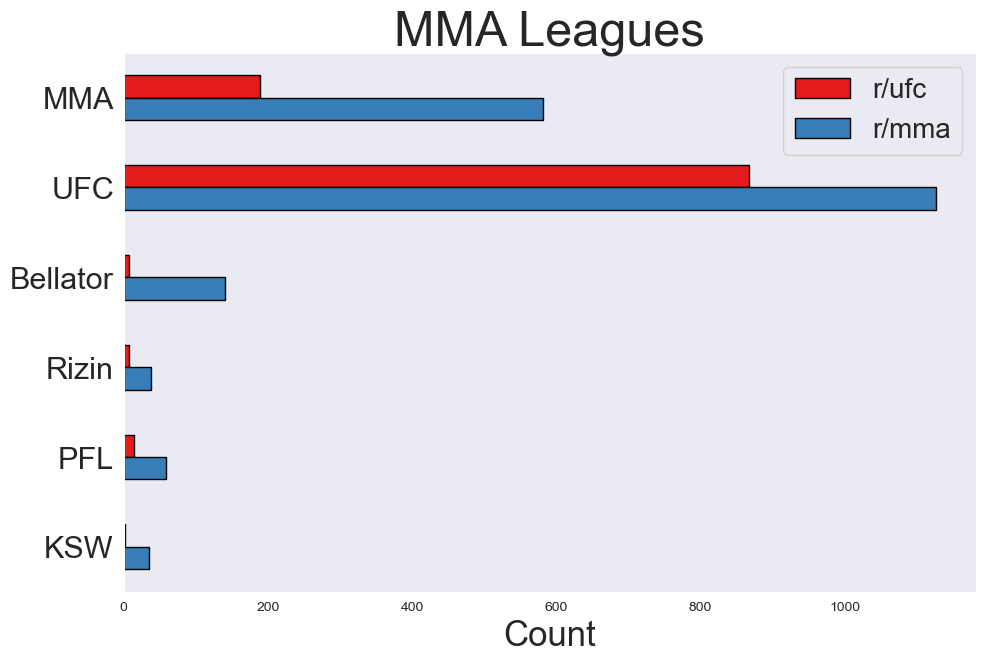

In [43]:
words_df.plot(kind = 'barh', figsize = (11, 7), edgecolor = 'black')
plt.rcParams['font.family'] = "Times New Roman";
sns.set_palette('Set1');
sns.set_style('dark');
plt.title('MMA Leagues', fontsize = 35);
plt.ylabel('', fontsize = 25);
plt.xlabel('Count', fontsize = 25);
plt.yticks(fontsize = 22)
plt.legend(fontsize = 20)
ax = plt.gca()
ax.invert_yaxis()
plt.savefig('../images/other_leagues.png', bbox_inches='tight');

---
#####
### Investigating Bigrams and Trigrams

#####
---

In [60]:
ufc = df[df['subreddit'] == 1].copy()
mma = df[df['subreddit'] == 0].copy()

In [79]:
def show_bigrams_cvec(category, number):
    '''
    Using Count Vectorizer, this function returns the top bigrams (according the number argument)
    for the title data of a specific Category (i.e. subreddit, misclassified, etc.)
    '''
    cvec_bigram = CountVectorizer(ngram_range=(2,2), stop_words = stop_words_list)
    if category == 'ufc':
        vec_bigram = cvec_bigram.fit_transform(ufc['title'])
    elif category == 'mma':
        vec_bigram = cvec_bigram.fit_transform(mma['title'])
    elif category == 'misclassified' or 'false_pos' or 'false_neg':
        new_df = df[df[category]==1]
        vec_bigram = cvec_bigram.fit_transform(new_df['title'])
    else:
         return None
    vec_bigram = pd.DataFrame(vec_bigram.todense(), columns=cvec_bigram.get_feature_names_out())
    return (vec_bigram.sum().sort_values(ascending = False).head(number))


def show_trigrams_cvec(category, number):
    '''
    Using Count Vectorizer, this function returns the top trigrams (according the number argument)
    for the title data of a specific Category (i.e. subreddit, misclassified, etc.)
    '''
    cvec_trigram = CountVectorizer(ngram_range=(3,3), stop_words = stop_words_list)
    if category == 'ufc':
        vec_trigram = cvec_trigram.fit_transform(ufc['title'])
    elif category == 'mma':
        vec_trigram = cvec_trigram.fit_transform(mma['title'])
    elif category == 'misclassified' or 'false_pos' or 'false_neg':
        new_df = df[df[category]==1]
        vec_trigram = cvec_trigram.fit_transform(new_df['title'])
    else:
         return None
    vec_trigram = pd.DataFrame(vec_trigram.todense(), columns=cvec_trigram.get_feature_names_out())
    return (vec_trigram.sum().sort_values(ascending = False).head(number))

In [80]:
show_bigrams_cvec('ufc', 30)

main event           47
unpopular opinion    44
darren till          36
jake paul            26
anik amp             25
fight night          23
post fight           23
du plessis           22
title shot           22
amp podcast          21
joe rogan            21
win fight            19
anikflorianpod rt    18
anikflorianpod ep    18
look like            17
title fight          17
jamahal hill         16
feel like            16
light heavyweight    16
won fight            15
hype train           15
power slap           15
year ago             15
ve seen              15
ray longo            15
mma fight            14
weight class         14
bobby green          14
jorge masvidal       13
fight year           13
dtype: int64

In [81]:
show_bigrams_cvec('mma', 30)

main event            103
discussion thread      90
fight night            58
official general       57
general discussion     57
prime video            38
anthony rumble         36
phil baroni            33
dillon danis           33
title fight            32
rizin 40               32
post fight             32
mma debut              32
shorts mma             31
mma fighter            30
glover teixeira        27
main card              27
passed away            26
kayla harrison         25
joe rogan              24
fighter removed        23
bellator rizin         23
jake paul              23
kevin holland          22
free fight             22
sean malley            22
artem lobov            22
cain velasquez         22
spoiler main           21
mma fight              21
dtype: int64

In [285]:
ufc_trigrams_cvec = show_trigrams_cvec('ufc', 30)
ufc_trigrams_cvec

anik amp podcast                 21
post fight interview             11
podcast youtube apple            10
jon_anik amp kennyflorian        10
youtube apple podcasts           10
apple podcasts spotify           10
amp podcast youtube              10
8th annual afpa                   9
raul rosas jr                     9
anikflorianpod code longo         8
code longo discount               8
ep 375 anik                       7
jon_anik kennyflorian podcast     7
hosts jon_anik amp                7
longo discount wqzidwkwmt         7
375 anik amp                      7
anikflorianpod ep 375             7
awards ray longo                  6
annual afpa awards                6
phil baroni arrested              6
afpa awards ray                   6
podcasts spotify ufc282           5
jack della maddalena              5
anikflorianpod ep 377             5
amp podcast awards                5
power slap league                 5
tweet merch discount              4
draftkings youtube oao9rujjn

In [286]:
mma_trigrams_cvec = show_trigrams_cvec('mma', 30)
mma_trigrams_cvec

general discussion thread      57
official general discussion    57
phil baroni arrested           17
live discussion thread         15
main event winner              14
spoiler main event             12
raul rosas jr                  11
main card fighter              11
make mma debut                 10
paulo robert fight             10
jack della maddalena            9
fight discussion thread         9
spoiler rizin 40                9
main event fighter              9
official fight night            9
vlog series episode             9
embedded vlog series            9
post fight interview            9
spoiler bellator 289            9
mma recap week                  8
official mma betting            8
betting discussion thread       8
official flair betting          8
spoiler cage warriors           8
mma betting discussion          8
rumble passed away              8
official technique amp          8
discussion thread january       8
spoiler main card               8
spoiler pfl 10

In [287]:
def show_bigrams_tvec(category, number):
    '''
    Using Tfidf Vectorizer, this function returns the top bigrams (according the number argument)
    for the title data of a specific Category (i.e. subreddit, misclassified, etc.)
    '''
    tvec_bigram = TfidfVectorizer(ngram_range=(2,2), stop_words = stop_words_list)
    if category == 'ufc':
        vec_bigram = tvec_bigram.fit_transform(ufc['title'])
    elif category == 'mma':
        vec_bigram = tvec_bigram.fit_transform(mma['title'])
    elif category == 'misclassified' or 'false_pos' or 'false_neg':
        new_df = df[df[category]==1]
        vec_bigram = tvec_bigram.fit_transform(new_df['title'])
    else:
         return None
    vec_bigram = pd.DataFrame(vec_bigram.todense(), columns=tvec_bigram.get_feature_names_out())
    return (vec_bigram.sum().sort_values(ascending = False).head(number))


def show_trigrams_tvec(category, number):
    '''
    Using Tfidf Vectorizer, this function returns the top trigrams (according the number argument)
    for the title data of a specific Category (i.e. subreddit, misclassified, etc.)
    '''
    tvec_trigram = TfidfVectorizer(ngram_range=(3,3), stop_words = stop_words_list)
    if category == 'ufc':
        vec_trigram = tvec_trigram.fit_transform(ufc['title'])
    elif category == 'mma':
        vec_trigram = tvec_trigram.fit_transform(mma['title'])
    elif category == 'misclassified' or 'false_pos' or 'false_neg':
        new_df = df[df[category]==1]
        vec_trigram = tvec_trigram.fit_transform(new_df['title'])
    else:
         return None
    vec_trigram = pd.DataFrame(vec_trigram.todense(), columns=tvec_trigram.get_feature_names_out())
    return (vec_trigram.sum().sort_values(ascending = False).head(number))

In [288]:
ufc_bigrams_tvec = show_bigrams_tvec('ufc', 30)
ufc_bigrams_tvec

unpopular opinion    15.805286
main event           14.655818
darren till          14.202574
jake paul             8.999302
post fight            8.563763
win fight             8.335444
fight night           7.340215
hype train            7.332259
rosas jr              7.107365
joe rogan             7.101779
bobby green           6.930439
title shot            6.771271
won fight             6.611192
du plessis            6.307485
power slap            6.250898
split draw            6.194527
fight year            5.989170
anik amp              5.756406
light heavyweight     5.726754
look like             5.717955
raul rosas            5.659841
prime prime           5.651728
fighter year          5.633788
drew dober            5.458718
title fight           5.446028
fight make            5.376484
jamahal hill          5.332235
jorge masvidal        5.288249
ve seen               5.264881
weight class          5.255863
dtype: float64

In [289]:
mma_bigrams_tvec = show_bigrams_tvec('mma', 30)
mma_bigrams_tvec

discussion thread     31.719877
main event            28.293509
official general      24.622836
general discussion    24.622836
fight night           16.770347
anthony rumble        12.957026
shorts mma            12.109032
fighter removed       11.966653
dillon danis          10.846280
post fight             9.842466
phil baroni            9.758913
rizin 40               9.743540
jake paul              9.343491
main card              9.210688
free fight             9.126972
passed away            9.014916
mma fighter            8.799692
mma fight              8.795328
official poster        8.578450
prime video            8.572800
artem lobov            8.207879
joe rogan              8.140729
mma debut              7.761626
title fight            7.742949
cain velasquez         7.600539
glover teixeira        7.405756
spoiler main           7.219172
bellator rizin         7.182873
robert fight           6.810159
sean malley            6.808843
dtype: float64

In [87]:
ufc_trigrams_tvec = show_trigrams_tvec('ufc', 30)
ufc_trigrams_tvec

raul rosas jr                    6.079579
anik amp podcast                 5.173050
post fight interview             4.794177
bigger class act                 4.000000
anikflorianpod code longo        3.756562
code longo discount              3.756562
happy new year                   3.535258
longo discount wqzidwkwmt        3.358289
outside t15 unranked             3.000000
power slap league                2.840406
phil baroni arrested             2.764893
podcast youtube apple            2.576409
youtube apple podcasts           2.576409
amp podcast youtube              2.576409
apple podcasts spotify           2.576409
just walk skyrim                 2.404211
think potential card             2.223537
andrew tate theme                2.195551
8th annual afpa                  2.127379
jake paul sign                   2.078332
jon_anik kennyflorian podcast    2.071620
light heavyweight champion       2.001442
375 anik amp                     2.000433
ep 375 anik                      2

In [88]:
mma_trigrams_tvec = show_trigrams_tvec('mma', 30)
mma_trigrams_tvec

general discussion thread      26.681761
official general discussion    26.681761
paulo robert fight              8.243142
phil baroni arrested            6.461377
fighter removed nate            6.437668
embedded vlog series            6.363961
vlog series episode             6.363961
live discussion thread          5.573793
spoiler main event              4.859172
main event winner               4.782636
official flair betting          4.305562
flair betting thread            4.305562
raul rosas jr                   4.288695
discussion thread january       4.150800
post fight interview            4.115046
main card fighter               3.981175
mma recap week                  3.824431
betting discussion thread       3.823495
mma betting discussion          3.823495
official mma betting            3.823495
amp training tuesday            3.728953
technique amp training          3.728953
official technique amp          3.728953
main event fighter              3.711061
rumble passed aw

#####

---

#####

## Misclassification Analysis
#####

---
#####


In [71]:
df['predictions'] = pipe02.predict(X)

In [290]:
df['misclassified'] = (df['predictions'] != df['subreddit']).astype(int)
df['false_pos'] = ((df['predictions'] == 1) & (df['subreddit'] == 0)).astype(int)
df['false_neg'] = ((df['predictions'] == 0) & (df['subreddit'] == 1)).astype(int)

In [291]:
columns = ['misclassified', 'false_pos', 'false_neg']
index = range(0, 10)
bigrams_df = pd.DataFrame(index=index, columns = columns)

In [292]:
for i in range(0, 10):
    bigrams_df['misclassified'][i] = show_bigrams_cvec('misclassified', 10).index.values[i]
for i in range(0, 10):
    bigrams_df['false_pos'][i] = show_bigrams_cvec('false_pos', 10).index.values[i]
for i in range(0, 10):
    bigrams_df['false_neg'][i] = show_bigrams_cvec('false_neg', 10).index.values[i]

In [293]:
dfi.export(bigrams_df, "../images/bigrams_table.png")
bigrams_df

,misclassified,false_pos,false_neg
0,main event,jake paul,main event
1,jake paul,joe rogan,phil baroni
2,phil baroni,feel like,mma fight
3,joe rogan,darren till,mma fighter
4,power slap,title shot,baroni arrested
5,feel like,best fighter,weight class
6,title fight,win fight,power slap
7,darren till,title fight,grappling match
8,mma fight,sean malley,rizin 40
9,glover teixeira,pound pound,fight night


The top False Positive and False Negative Bigrams makes sense when considering which are being misclassified (ie - 'Title Fight' misclassified a r/mma post as a r/ufc post. Whereas "mma fight" does the same for r/ufc)

In [294]:
columns = ['misclassified', 'false_pos', 'false_neg']
index = range(0, 10)
trigrams_df = pd.DataFrame(index=index, columns = columns)
for i in range(0, 10):
    trigrams_df['misclassified'][i] = show_trigrams_cvec('misclassified', 10).index.values[i]
for i in range(0, 10):
    trigrams_df['false_pos'][i] = show_trigrams_cvec('false_pos', 10).index.values[i]
for i in range(0, 10):
    trigrams_df['false_neg'][i] = show_trigrams_cvec('false_neg', 10).index.values[i]

In [315]:
dfi.export(trigrams_df, "../images/trigrams_table.png")
trigrams_df

,misclassified,false_pos,false_neg
0,phil baroni arrested,dricus du plessis,phil baroni arrested
1,power slap league,single gsp takedown,rizin 40 spoilers
2,raul rosas jr,tory red shirt,fighter phil baroni
3,rizin 40 spoilers,pharaoh hamdy abdelwahab,teixeira jamahal hill
4,glover teixeira jamahal,darren till dricus,tatiana suarez make
5,dricus du plessis,best chance beating,mma fight phil
6,single gsp takedown,raul rosas jr,raul rosas jr
7,teixeira jamahal hill,prime chael sonnen,fight goofy sound
8,fighter phil baroni,ve better fight,damir main event
9,turn mma fight,till dricus du,allegedly murdering girlfriend


In [576]:
df[df['false_neg'] == 1]['title'][14]

'Confirmed: Khabib Nurmagomedov ha ‘left the MMA industry’'

In [573]:
df[df['false_pos'] == 1]['title'][18]

'Every Mythical Fighter Of The UFC | Explained'

In [338]:
# GOT ALL OF THIS PLOT MANIPULATION FROM : https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08
    # and from : https://www.statology.org/matplotlib-legend-position/, 
import matplotlib.style as style


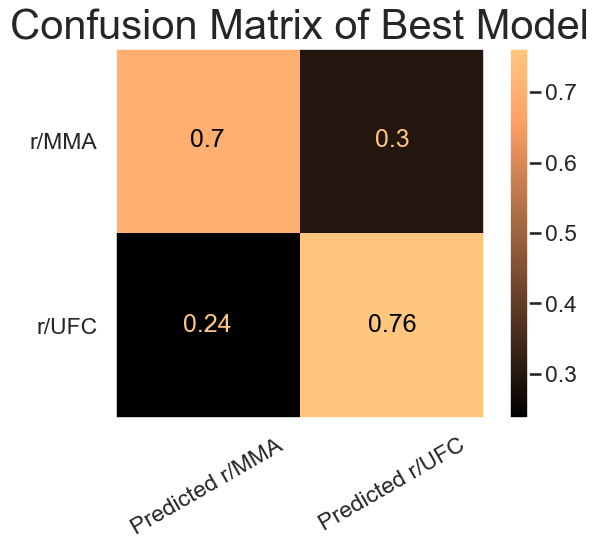

In [455]:
preds = pipe02.predict(X_test)
ax = ConfusionMatrixDisplay.from_estimator(pipe02, X_test, y_test, normalize = 'true', cmap = 'copper')
plt.title('Confusion Matrix of Best Model', fontsize = 30)
plt.xticks(ticks = [0,1], labels = ['Predicted r/MMA', 'Predicted r/UFC'] , rotation = 30)
plt.yticks(ticks = [0,1], labels = ['r/MMA', 'r/UFC'])
plt.ylabel('')
plt.xlabel('') 
sns.set_context('talk');

plt.savefig('../images/ConfusionMatrix_test.png', bbox_inches='tight')

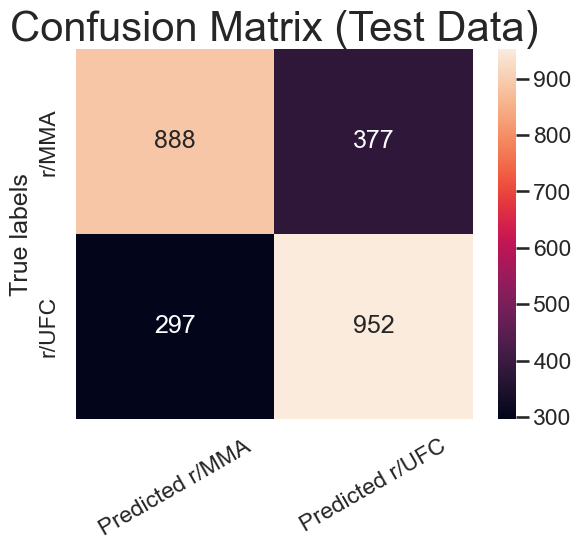

In [456]:
# From https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

ax= plt.subplot()
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Test Data)', fontsize = 30); 
ax.xaxis.set_ticklabels(['Predicted r/MMA', 'Predicted r/UFC'], rotation = 30); 
ax.yaxis.set_ticklabels(['r/MMA', 'r/UFC']);
plt.savefig('../images/ConfusionMatrix_test_2.png', bbox_inches='tight')

In [95]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [96]:
df['false_pos'].sum()

783

In [22]:
df['false_neg'].sum()

570

#### Misclassification Sentiment Analysis

In [544]:
df1 = df[['neg_sent_score', 'neutral_sent_score', 'pos_sent_score', 'cmpd_sent_score', 'subreddit']].groupby(['subreddit']).mean()
#dfi.export(df1, "../images/sentiment_by_subreddit.png")
df1

,neg_sent_score,neutral_sent_score,pos_sent_score,cmpd_sent_score
subreddit,,,,
0,0.086476,0.830178,0.082748,-0.006336
1,0.100555,0.781597,0.115049,0.022480


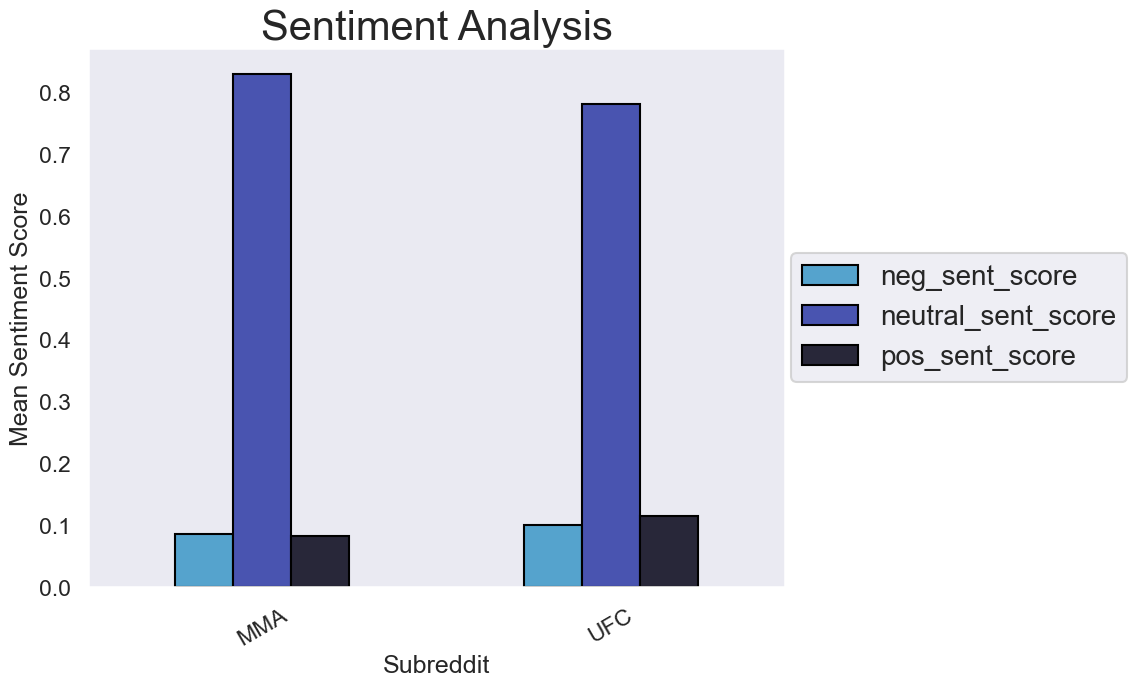

In [549]:
df1_1 = df[['neg_sent_score', 'neutral_sent_score', 'pos_sent_score', 'subreddit']].groupby(['subreddit']).mean()

plt.rcParams['font.family'] = "Times New Roman";
sns.set_palette('icefire');
sns.set_style('dark');
df1_1.plot(kind = 'bar', figsize = (9, 7), edgecolor = 'black')
plt.legend(bbox_to_anchor=(1.51, 0.5), loc='right', fontsize = 20);
labels = ['MMA', 'UFC']
plt.xticks(ticks = [0,1], labels = labels, rotation = 30);
plt.title('Sentiment Analysis', fontsize = 30);
plt.ylabel('Mean Sentiment Score');
plt.xlabel('Subreddit');
plt.savefig('../images/Sentiment_subredddit.png', bbox_inches='tight');


Text(0.5, 0, 'Misclassified')

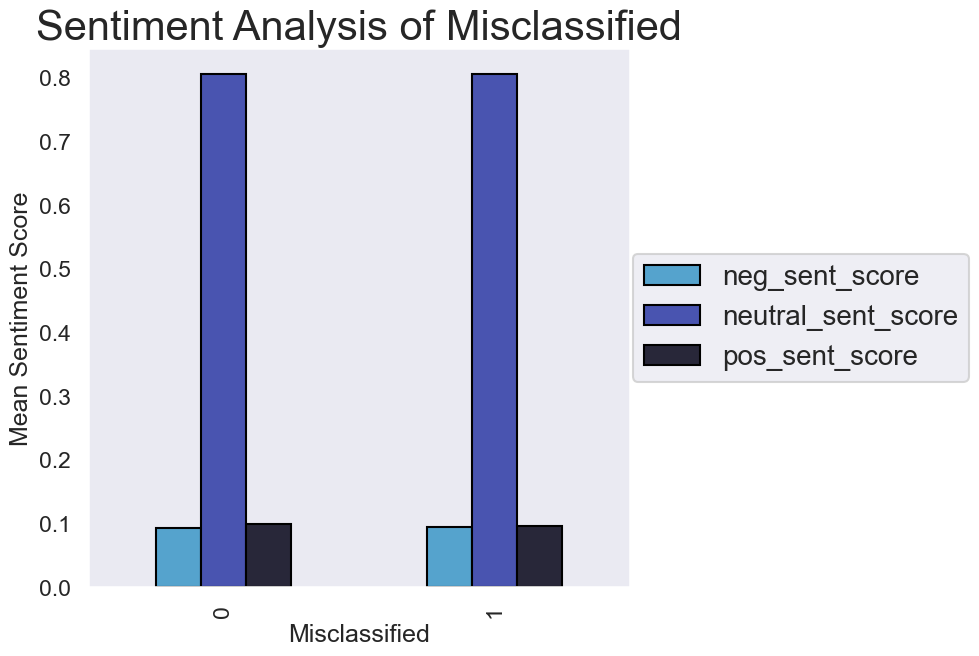

In [543]:
df1_1 = df[['neg_sent_score', 'neutral_sent_score', 'pos_sent_score', 'misclassified']].groupby(['misclassified']).mean()

plt.rcParams['font.family'] = "Times New Roman"
#sns.set_context('talk')
#sns.set_palette('gist_heat_r')
sns.set_style('dark')
df1_1.plot(kind = 'bar', figsize = (7, 7), edgecolor = 'black')
plt.legend(bbox_to_anchor=(1.65, 0.5), loc='right', fontsize = 20)
#labels = ['True MMA', 'Misclass UFC', 'Misclass MMA', 'True UFC']
#plt.xticks(ticks = [0,1,2,3], labels = labels, rotation = 30)
plt.title('Sentiment Analysis of Misclassified', fontsize = 30)
plt.ylabel('Mean Sentiment Score')
plt.xlabel('Misclassified')
#plt.savefig('../images/Sentiment_misclassified.png', bbox_inches='tight')


In [429]:
df2 = df[['neg_sent_score', 'neutral_sent_score', 'pos_sent_score', 'subreddit', 'misclassified']].groupby(['subreddit', 'misclassified']).mean()
#dfi.export(df2, "../images/sentiment_by_misclassified.png")
df2

neg_sent_score  neutral_sent_score  pos_sent_score
subreddit misclassified                                                    
0         0                    0.084627            0.838400        0.076967
          1                    0.096566            0.785294        0.114301
1         0                    0.101650            0.774805        0.120393
          1                    0.091860            0.835503        0.072631

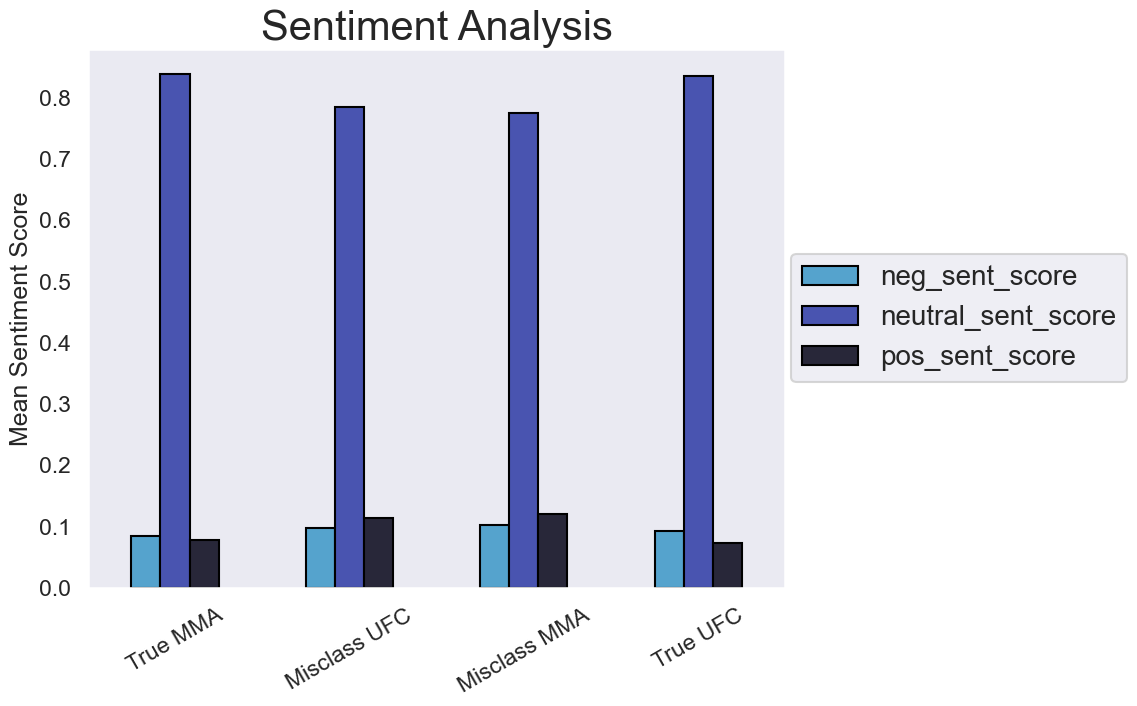

In [550]:
plt.rcParams['font.family'] = "Times New Roman"
#sns.set_context('talk')
#sns.set_palette('gist_heat_r')
sns.set_style('dark')
df2.plot(kind = 'bar', figsize = (9, 7), edgecolor = 'black')
plt.legend(bbox_to_anchor=(1.51, 0.5), loc='right', fontsize = 20)
labels = ['True MMA', 'Misclass UFC', 'Misclass MMA', 'True UFC']
plt.xticks(ticks = [0,1,2,3], labels = labels, rotation = 30)
plt.title('Sentiment Analysis', fontsize = 30)
plt.ylabel('Mean Sentiment Score')
plt.xlabel('')
plt.savefig('../images/Sentiment_Analysis.png', bbox_inches='tight')

#### Misclassification Parts of Speech Analysis

In [413]:
df3 =df[['adj_num', 'verb_num', 'noun_num', 'adv_num', 'subreddit']].groupby(['subreddit']).mean()
#dfi.export(df3, "../images/POS_by_subreddit.png")
df3

,adj_num,verb_num,noun_num,adv_num
subreddit,,,,
0,0.678268,1.450662,5.971129,0.316195
1,0.762210,1.829464,4.438151,0.479183


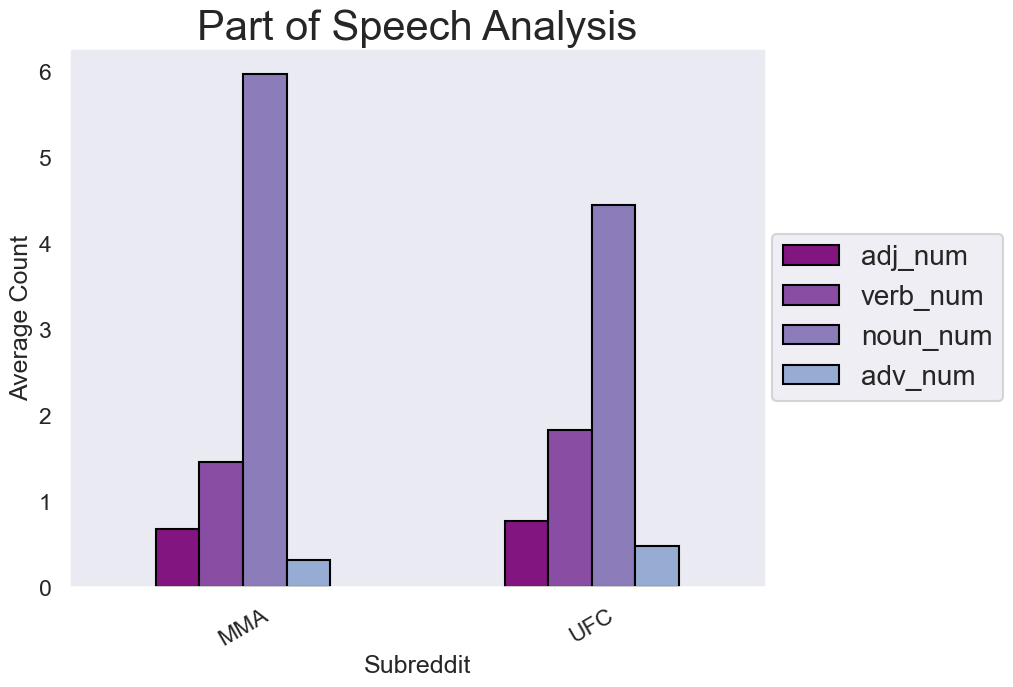

In [556]:
plt.rcParams['font.family'] = "Times New Roman"
#sns.set_context('talk')
sns.set_palette('BuPu_r')
sns.set_style('dark')
df3.plot(kind = 'bar', figsize = (9, 7), edgecolor = 'black')
plt.legend(bbox_to_anchor=(1.36, 0.5), loc='right', fontsize = 20)
labels = ['MMA', 'UFC']
plt.xticks(ticks = [0,1], labels = labels, rotation = 30)
plt.title('Part of Speech Analysis', fontsize = 30)
plt.ylabel('Average Count')
plt.xlabel('Subreddit')
plt.savefig('../images/POS_subreddit.png', bbox_inches='tight')


In [439]:
df4 = df[['adj_num', 'verb_num', 'noun_num', 'adv_num', 'subreddit', 'misclassified']].groupby(['subreddit', 'misclassified']).mean()
dfi.export(df4, "../images/POS_by_misclassified.png")
df4

adj_num  verb_num  noun_num   adv_num
subreddit misclassified                                        
0         0              0.681095  1.410856  6.264857  0.305101
          1              0.662835  1.667944  4.367816  0.376756
1         0              0.778679  1.884607  4.352490  0.494253
          1              0.631485  1.391771  5.118068  0.359571

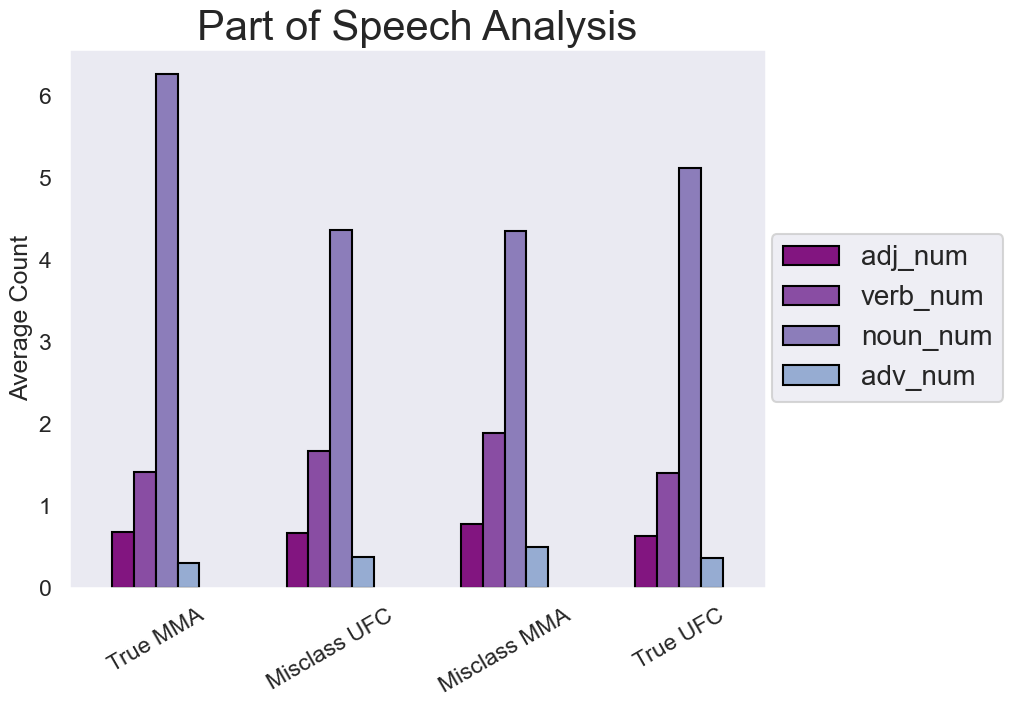

In [560]:
plt.rcParams['font.family'] = "Times New Roman"
#sns.set_context('talk')
sns.set_palette('BuPu_r')
sns.set_style('dark')
df4.plot(kind = 'bar', figsize = (9, 7), edgecolor = 'black')
plt.legend(bbox_to_anchor=(1.36, 0.5), loc='right', fontsize = 20)
labels = ['True MMA', 'Misclass UFC', 'Misclass MMA', 'True UFC']
plt.xticks(ticks = [0,1,2,3], labels = labels, rotation = 30)
plt.title('Part of Speech Analysis', fontsize = 30)
plt.ylabel('Average Count')
plt.xlabel('')
plt.savefig('../images/POS_confusionmatrix.png', bbox_inches='tight')

In [442]:
#Just checking word count mean and distribution
df[['word_count', 'subreddit']].groupby(['subreddit']).mean()

,word_count
subreddit,
0,11.772395
1,11.158527


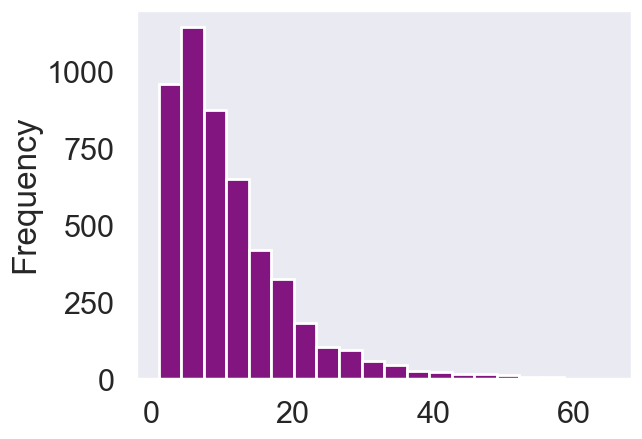

In [451]:
df[df['subreddit'] == 1]['word_count'].plot(kind = 'hist', bins = 20);

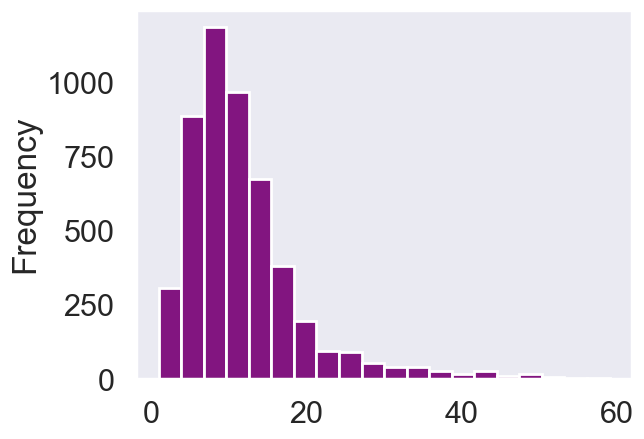

In [450]:
df[df['subreddit'] == 0]['word_count'].plot(kind = 'hist', bins = 20);